<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/Classify_face_celeb_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2 #open cv
import os
import matplotlib.pyplot as plt

In [ ]:
# scaling all images to 47 * 62 using OpenCV resize function
i = 0
for imgfolder in os.listdir('drive/My Drive/Data/'):
    for filename in os.listdir('drive/My Drive/Data/' + imgfolder):
        filename = 'drive/My Drive/Data/' + imgfolder+ '/'+ filename
        img=cv2.imread(filename,0)
        img = cv2.resize(img, (216,216), interpolation = cv2.INTER_AREA)
        print(i)
        i+=1

In [5]:
# building an array of images and finding its shape.
X_images = []
for imgfolder in os.listdir('drive/My Drive/Data/'):
    for filename in os.listdir('drive/My Drive/Data/' + imgfolder):
        filename = 'drive/My Drive/Data/' + imgfolder + '/' + filename
        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
        X_images.append(img)
X_images = np.asarray(X_images)
X_images.shape

(500, 67, 42)

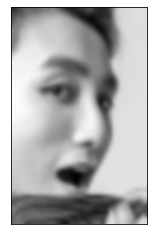

In [6]:
plt.imshow(X_images[20], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [7]:
y_train = []
for imgfolder in os.listdir('drive/My Drive/Data/'):
    for filename in os.listdir('drive/My Drive/Data/' + imgfolder):
        y_train.append(imgfolder)
y_train = np.asarray(y_train)
y_train.shape

(500,)

In [8]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_images, y_train, test_size = 0.2, random_state =42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


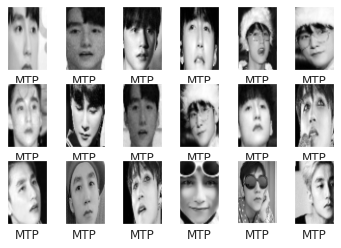

In [12]:
#display training images and labels to make sure they lineup correctly
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

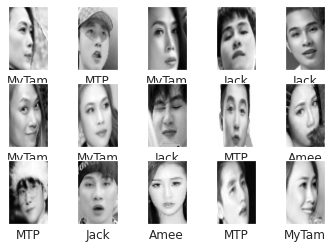

In [19]:
#display test images and labels to make sure they lineup correctly
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=Y_test[i])

In [15]:
from sklearn.decomposition import PCA as RandomizedPCA


In [26]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [27]:
#flatten images.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [28]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [38]:
# doing cross validation to tune the params of SVC

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, Y_train)
print(grid.best_params_)

CPU times: user 32.8 s, sys: 9.07 s, total: 41.9 s
Wall time: 21.2 s
{'svc__C': 5, 'svc__gamma': 0.005}


In [39]:
grid.best_score_

0.5800000000000001

In [40]:
# pick the best model from the grid search above and use it to classify the test dataset
model = grid.best_estimator_
pred = model.predict(X_test)

In [41]:
pred

array(['MyTam', 'NDLN', 'MyTam', 'Jack', 'Jack', 'MyTam', 'MTP', 'Jack',
       'NDLN', 'MTP', 'MyTam', 'Jack', 'Amee', 'MTP', 'Amee', 'MTP',
       'Amee', 'MTP', 'Amee', 'Amee', 'MyTam', 'Jack', 'NDLN', 'MyTam',
       'MTP', 'NDLN', 'NDLN', 'NDLN', 'Jack', 'Amee', 'NDLN', 'Amee',
       'Amee', 'MyTam', 'Jack', 'MyTam', 'NDLN', 'MyTam', 'NDLN', 'MTP',
       'MyTam', 'MTP', 'Amee', 'Jack', 'MyTam', 'MTP', 'MTP', 'MTP',
       'Amee', 'NDLN', 'MTP', 'Jack', 'Jack', 'MyTam', 'MTP', 'MTP',
       'Jack', 'NDLN', 'NDLN', 'MTP', 'Amee', 'MyTam', 'MyTam', 'MyTam',
       'NDLN', 'MTP', 'Amee', 'Amee', 'NDLN', 'MyTam', 'MyTam', 'Amee',
       'NDLN', 'NDLN', 'MyTam', 'MTP', 'NDLN', 'MyTam', 'NDLN', 'Amee',
       'Jack', 'MTP', 'NDLN', 'Jack', 'Amee', 'MTP', 'Jack', 'Amee',
       'MyTam', 'NDLN', 'NDLN', 'Amee', 'MyTam', 'MyTam', 'Amee', 'MyTam',
       'MyTam', 'Jack', 'Amee', 'MyTam'], dtype='<U5')

In [34]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

In [42]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

        Amee       0.54      0.65      0.59        20
        Jack       0.86      0.80      0.83        15
         MTP       0.50      0.74      0.60        19
       MyTam       0.58      0.56      0.57        25
        NDLN       0.90      0.43      0.58        21

    accuracy                           0.62       100
   macro avg       0.68      0.64      0.63       100
weighted avg       0.67      0.62      0.62       100



In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred, Y_test))

[[13  0  1  6  0]
 [ 1 12  2  0  0]
 [ 1  1 14  3  0]
 [ 3  1  6 14  1]
 [ 6  0  5  1  9]]


In [44]:
accuracy_score(pred, Y_test)

0.62

# CNN



In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

In [ ]:
x = X_images
y = y_train

In [68]:
image_size = 216
num_steps = 500
batch_size = 128
display_step = 10

# Network Parameters
num_input = 42*67
num_classes = 5

In [ ]:
conv1 = tf.layers.conv2d(x, 8, 5, activation=tf.nn.relu)
  conv1 = tf.layers.max_pooling2d(conv1, 4, 4)
  conv2 = tf.layers.conv2d(conv1, 16, 5, activation=tf.nn.relu)
  conv2 = tf.layers.max_pooling2d(conv2, 4, 4)
  conv3 = tf.layers.conv2d(conv2, 32, 3, activation=tf.nn.relu)
  conv3 = tf.layers.max_pooling2d(conv3, 2, 2)

  fc1 = tf.contrib.layers.flatten(conv3)
  fc1 = tf.layers.dense(fc1, 256)
  out = tf.layers.dense(fc1, num_classes)

In [69]:
model = keras.Sequential([
  Conv2D(16,3, padding = 'same', activation = 'relu', input_shape = (67,42,1)),
  MaxPooling2D(),
  Conv2D(32,3, padding = 'same', activation = 'relu'),
  MaxPooling2D(),
  Conv2D(64,3, padding= 'same', activation = 'relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(5, activation='softmax')

])

NameError: ignored